#### CNN pipeline 
- Conv layer (Filters) 
- Strides and padding (To save from the corner features problem)
- Pooling layer (Max and average)
- Dropouts

In [1]:
### Data import 
import cv2

img = cv2.imread('index.jpg')

In [8]:
"""Function to print the image"""
import matplotlib.pyplot as plt
def printImage(img,title="image"):
    plt.style.use("seaborn")
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

Original image


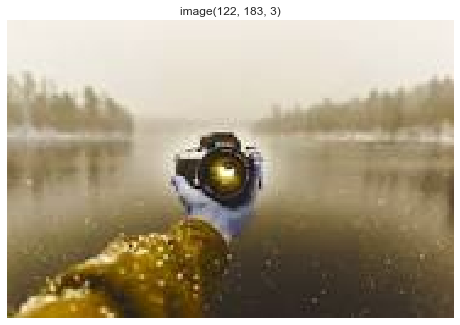

Gray image


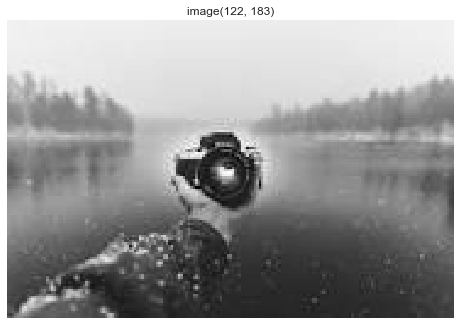

In [10]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("Original image")
printImage(img)
print("Gray image")
printImage(img_gray)

In [13]:
import numpy as np
def convolutional(img,img_filter):
    """Function apply the filter to the image and return the new image"""
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    if new_img[row][col] > 255:
                        new_img[row][col] = 255
                    elif new_img[row][col] < 0:
                        new_img[row][col] = 0
                    
    return new_img

In [17]:
blur_filter = np.ones((3,3))/9.0
output1 = convolutional(img_gray,blur_filter)
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output2 = convolutional(img_gray,edge_filter)

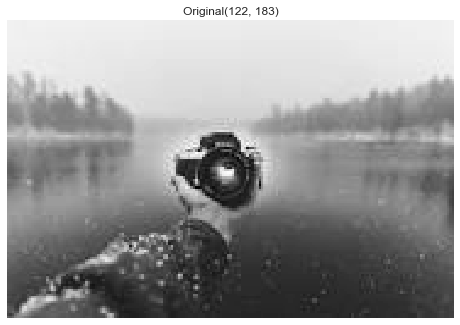

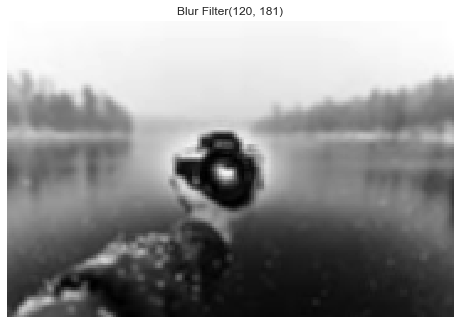

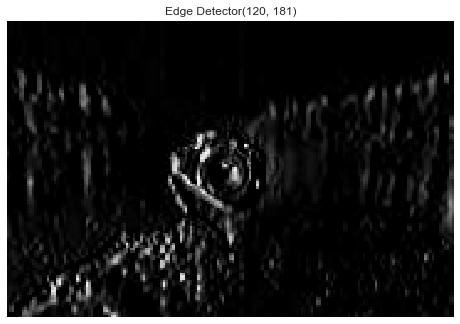

In [18]:
printImage(img_gray,"Original")
printImage(output1,"Blur Filter")
printImage(output2,"Edge Detector")

In [24]:
# padding image
pad_img = np.pad(img_gray, ((10,10), (10,10)), 'constant', constant_values =200)

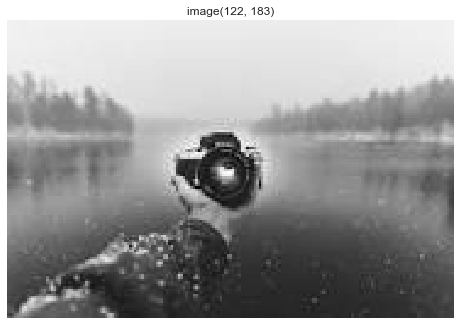

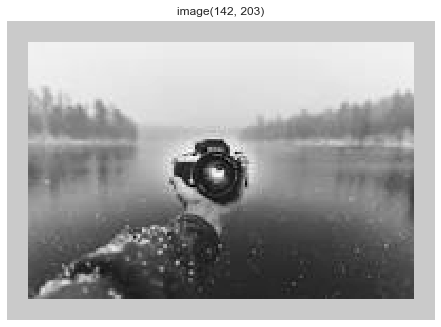

In [27]:
printImage(img_gray)
printImage(pad_img)

In [28]:
##Pooling and stride
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

X_pool_output = np.zeros((2,2))

H,W = X.shape
f = 2
stride = 2

#Zero Padding
HO = int((H-f)/stride) + 1
WO = int((W-f)/stride) + 1

for r in range(HO):
    for c in range(WO):
        r_start = r*stride
        r_end = r_start + f
        c_start = c*stride
        c_end = c_start + f
        X_slice = X[r_start:r_end,c_start:c_end]
        X_pool_output[r][c] = np.max(X_slice)
print("X \n",X)
print("X after Pooling \n",X_pool_output)

X 
 [[1 0 2 3]
 [4 6 6 8]
 [3 1 1 0]
 [1 2 2 4]]
X after Pooling 
 [[6. 8.]
 [3. 4.]]
